In [47]:
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt
import json,os
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

os.chdir("D:\CSP 571\yelp data")
business = pd.read_json('business.json', lines=True)

### First we will chek the columns of the business data

In [48]:
business.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [49]:
business.categories

0                                         Golf, Active Life
1         Specialty Food, Restaurants, Dim Sum, Imported...
2                         Sushi Bars, Restaurants, Japanese
3                             Insurance, Financial Services
4         Plumbing, Shopping, Local Services, Home Servi...
                                ...                        
192604    Water Purification Services, Water Heater Inst...
192605                 Books, Mags, Music & Video, Shopping
192606    Home Services, Contractors, Landscaping, Mason...
192607                               Beauty & Spas, Barbers
192608                               Massage, Beauty & Spas
Name: categories, Length: 192609, dtype: object

### Business data consists of information based on a lot of categories such as Golf, Insurance, etc. but a single business can be categorized in multiple ways. Therefore, we shall split the categories in the "Category" column

In [50]:
business = business.assign(categories = business.categories.str.split(', ')).explode('categories')
cat = business.categories.value_counts()

In [51]:
cat = cat.to_frame().reset_index()

In [52]:
cat.columns = ['Categories', 'Count']
cat

,Categories,Count
0,Restaurants,59371
1,Shopping,31878
2,Food,29989
3,Home Services,19729
4,Beauty & Spas,19370
...,...,...
1295,Sauna Installation & Repair,1
1296,Sport Equipment Hire,1
1297,Experiences,1
1298,Tempura,1


### There are 1300 categories. We shall check top 10 categories.

In [53]:
cat= cat.sort_values(by = 'Count', ascending = False)

In [54]:
cat = cat[0:10]

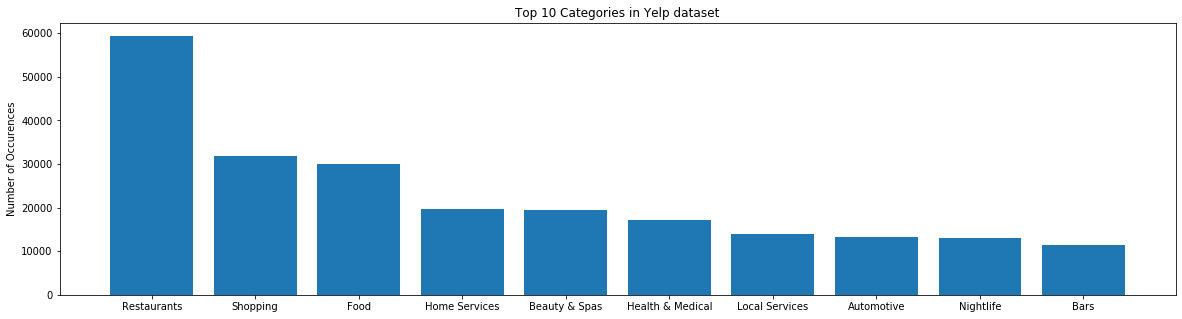

In [55]:
objects = list(cat.Categories)
y_pos = np.arange(len(objects))
Numbers = list(cat.Count)

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
plt.bar(y_pos, Numbers, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Occurences')
plt.title('Top 10 Categories in Yelp dataset')
plt.show()

### These are the top 10 categories in this data. But for our analysis, we shall focus more on business which comes in restaurant category. 

In [56]:
# business = business.assign(categories = business.categories.str.split(', ')).explode('categories')
# count = business.categories.value_counts().tolist()
# res_cat = business.categories.tolist()
# res_cat = list(set(res_cat))

In [57]:
# count = business.categories.value_counts().tolist()
# categories_list = business.categories.str.split().tolist()
# categories_list

In [58]:
# business = business.assign(categories = business.categories.str.split(', ')).explode('categories')
business = business[business.categories.str.contains('Restaurants', case=True,na=False)]
business

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...",Restaurants,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",Restaurants,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
11,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,AZ,85016,33.495194,-112.028588,3.0,18,1,"{'RestaurantsTakeOut': 'True', 'BusinessParkin...",Restaurants,"{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W..."
13,fweCYi8FmbJXHCqLnwuk8w,Marco's Pizza,5981 Andrews Rd,Mentor-on-the-Lake,OH,44060,41.708520,-81.359556,4.0,16,1,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...",Restaurants,"{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ..."
17,PZ-LZzSlhSe9utkQYU8pFg,Carluccio's Tivoli Gardens,"1775 E Tropicana Ave, Ste 29",Las Vegas,NV,89119,36.100016,-115.128529,4.0,40,0,"{'OutdoorSeating': 'False', 'BusinessAcceptsCr...",Restaurants,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192587,oS0CnUbyv0GUoD3L8_3UPQ,Thai Fantasy,578 Yonge Street,Toronto,ON,M4Y 1Z3,43.665120,-79.384809,4.0,113,1,"{'RestaurantsPriceRange2': '2', 'RestaurantsGo...",Restaurants,"{'Monday': '0:0-0:0', 'Tuesday': '11:0-23:0', ..."
192589,ghovD5ZTGDQ5Q2U4ERddWw,Five Guys,3863 Medina Rd,Fairlawn,OH,44333,41.136561,-81.639712,4.0,22,1,"{'RestaurantsPriceRange2': '2', 'HasTV': 'Fals...",Restaurants,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
192595,h3QErqS3OZgLJ5Tb6-sLyQ,Asia Hut,1450 Kingston Rd,Pickering,ON,L1V 1C1,43.841844,-79.083881,4.5,4,1,"{'BikeParking': 'True', 'RestaurantsAttire': '...",Restaurants,"{'Monday': '11:0-21:30', 'Tuesday': '11:0-21:3..."
192596,KnafX7T6qSAmSrLhd709vA,Pho Maisonneuve,948 Boulevard de Maisonneuve Est,MontrÃ©al,QC,H2L 1Z1,45.517430,-73.558873,4.0,25,1,"{'GoodForKids': 'True', 'WiFi': 'u'no'', 'Rest...",Restaurants,"{'Monday': '12:0-21:0', 'Tuesday': '12:0-21:0'..."


### We only need to focus on the restaurants which are open ( i.e. business.is_open ==1) 

In [59]:
# Taking into the consideration the businesses which are open
# 1 = open, 0 = closed
business = business[business['is_open']==1]

### Now we shall see the distribution of state in this dataset

In [60]:
state_count = business.state.value_counts()

In [61]:
state_count = state_count.to_frame().reset_index()
state_count.columns = ['State', 'Counts']

In [2]:
objects = list(state_count.State)
y_pos = np.arange(len(objects))
Numbers = list(state_count.Counts)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
plt.bar(y_pos, Numbers, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Occurences')
plt.title('Distribution of State in Yelp dataset')
plt.show()



NameError: name 'state_count' is not defined

### From this, graph, we see the statewise distribution of restaurants. As we can see, this data consists of restaurants present all over the world. For the sake of simplicity, we will focus on the restaurants present in Illinois.

In [63]:
business_in_IL = business[business.state == 'IL']

In [64]:
business_in_IL

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
356,mofOjB6flg-eAWOFbOkHfQ,ChinaTown Buffet,713 W Marketview Dr,Champaign,IL,61822,40.137270,-88.256043,2.5,72,1,"{'WiFi': 'u'no'', 'RestaurantsReservations': '...",Restaurants,"{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
431,m4DwPVxmFDQE_FnGIOa3cQ,Sunny China Buffet,1703 Philo Rd,Urbana,IL,61802,40.097639,-88.191217,3.5,15,1,"{'RestaurantsGoodForGroups': 'True', 'Business...",Restaurants,None
1056,HbK6IfznbVToEaKVC0WcSg,The Clark Bar,207 W Clark St,Champaign,IL,61820,40.115017,-88.246156,3.5,24,1,"{'Alcohol': 'u'full_bar'', 'GoodForKids': 'Fal...",Restaurants,"{'Tuesday': '16:0-2:0', 'Wednesday': '16:0-2:0..."
1224,o9nGD3J0btXjE9M6IdgZTA,McAlister's Deli,421 Town Center Rd,Champaign,IL,61820,40.141668,-88.250360,3.0,50,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...",Restaurants,"{'Monday': '0:0-0:0', 'Tuesday': '10:30-21:0',..."
1914,sDfN5qJlmvrwTfwEPBsxSg,Dairy Queen,1103 Klein Ave,Rantoul,IL,61866,40.311299,-88.142882,2.0,4,1,"{'GoodForKids': 'False', 'BusinessAcceptsCredi...",Restaurants,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190268,nD4cF5IH8RE7LFGdR2FMUA,Windy City Express,410 N Race St,Urbana,IL,61801,40.116172,-88.208663,3.5,28,1,"{'RestaurantsTakeOut': 'True', 'Alcohol': 'u'n...",Restaurants,None
191141,zTGxLMOd9crAz0XNzqrcrA,Empire Chinese Restaurant,"410 E Green St, Ste 1",Champaign,IL,61820,40.110638,-88.232483,3.5,48,1,"{'BusinessAcceptsCreditCards': 'True', 'BYOBCo...",Restaurants,"{'Monday': '11:0-22:30', 'Tuesday': '11:0-22:3..."
191232,0QgFIP9W0eGZSxCSQRQSCg,Subway,"701 S Gregory St, Ste A",Urbana,IL,61801,40.106711,-88.221752,2.5,6,1,"{'RestaurantsDelivery': 'False', 'RestaurantsR...",Restaurants,None
191657,gZtJyb2oEpwo1rnovDVPfA,Intermezzo CafÃ©,500 S Goodwin Ave,Urbana,IL,61801,40.108000,-88.222501,3.5,11,1,"{'RestaurantsTakeOut': 'True', 'BusinessAccept...",Restaurants,"{'Monday': '7:30-15:30', 'Tuesday': '7:30-15:3..."


In [65]:
business_in_IL.to_csv("Business_in_Illinois.csv")

In [66]:

# city_il = business_in_IL.city.value_counts()
# city_il = city_il.to_frame().reset_index()
# city['latitude'] = business_in_IL[]
# city_il.columns = ['City', 'Counts']

fig = px.scatter_mapbox(business_in_IL, lat="latitude", lon="longitude", hover_name="city", color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

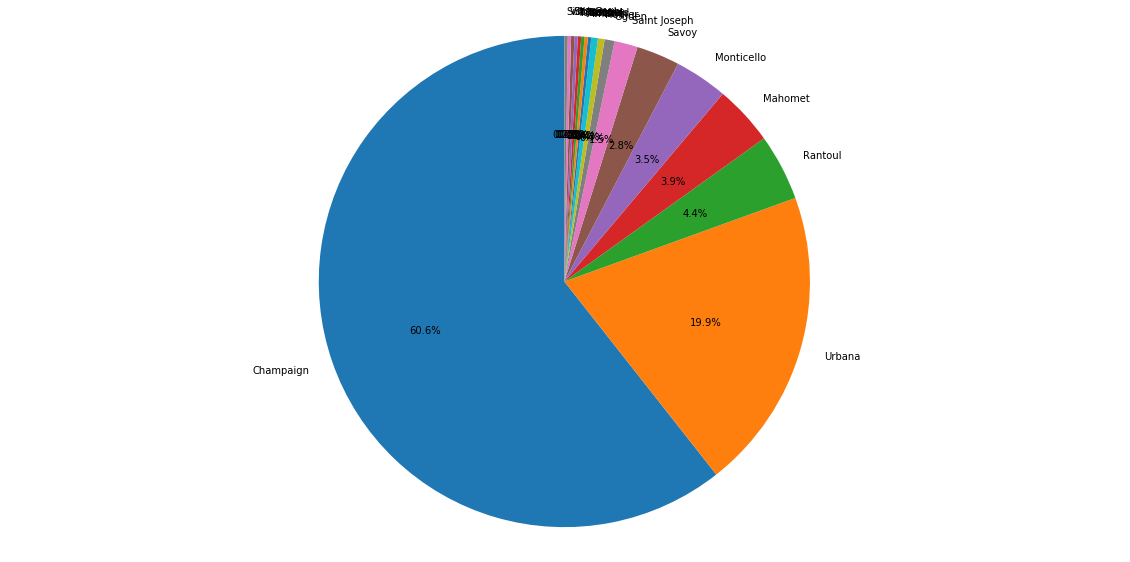

In [67]:
city_il = business_in_IL.city.value_counts()
city_il = city_il.to_frame().reset_index()
city_il.columns = ['City', 'Counts']
labels = list(city_il.City)
sizes = list(city_il.Counts)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

In [1]:
### Focusing on the stars achieved by the businesses


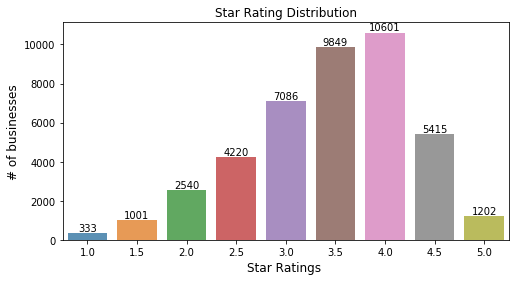

In [70]:
#Get the distribution of the ratings
x=business['stars'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()